In [13]:
import pandas
import matplotlib.pyplot as plt
import pickle
import wntr
from testWN import testWN as twm

In [40]:
%matplotlib notebook

# Water Network

In [14]:
inp_file = '../Networks/BWCNdata/c-town_true_network.inp'
ctown = twm(inp_file)

/home/ffiedler/miniconda3/envs/py37_WNTR/lib/python3.7/site-packages/wntr/epanet/io.py:2088: UserWarning:

Not all curves were used in "../Networks/BWCNdata/c-town_true_network.inp"; added with type None, units conversion left to user



# Results

In [33]:
with open('results.pkl', 'rb') as f:
    results=pickle.load(f)

In [36]:
results.node.keys()

dict_keys(['demand', 'head', 'pressure', 'quality'])

In [82]:
results.node['head']

name,J511,J411,J414,J415,J416,J417,J418,J419,J310,J311,...,J317,J323,R1,T3,T1,T7,T6,T5,T2,T4
0,134.966690,74.867050,69.279076,148.042557,139.981873,67.400528,66.473473,65.894272,105.688034,105.704720,...,112.791748,112.791748,59.0,115.899994,74.500000,104.500000,106.699997,106.800003,65.500000,135.000000
3600,134.816772,74.802544,69.397820,149.690887,141.846375,67.584785,66.690910,66.137482,106.470062,106.483704,...,113.698639,113.698639,59.0,116.487625,74.411598,105.007004,106.966805,107.383644,65.771774,134.758423
7200,135.395538,74.434021,69.318871,152.701874,145.301239,67.639832,66.818375,66.325600,107.223923,107.245590,...,115.619095,115.619095,59.0,117.082664,74.329742,105.913155,107.000000,107.962723,66.034103,135.066467
10800,136.280853,74.732315,69.646538,154.235336,147.037903,67.939423,67.097656,66.585411,109.526131,109.536362,...,119.869194,119.869194,59.0,117.685532,74.184097,106.413040,107.000000,108.739983,66.266945,135.849640
14400,137.187653,75.194115,70.760399,155.368790,148.069397,69.275146,68.543488,67.767586,105.421417,105.425797,...,105.336548,105.336548,59.0,118.185341,74.217445,106.064194,106.838158,109.556831,66.530045,136.753128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846000,135.564789,73.927467,70.933807,148.571304,140.109055,69.964996,69.494247,69.312447,106.042984,106.087898,...,112.478722,112.478722,59.0,116.204659,72.617050,105.891434,107.000000,108.444000,69.436882,135.778152
849600,135.128860,73.563820,70.661453,149.090347,140.728821,69.747368,69.308861,69.148643,107.697968,107.715698,...,117.688469,117.688469,59.0,116.594688,72.750137,105.551903,107.000000,107.694527,69.289841,135.135712
853200,135.297195,73.355209,70.518944,152.694519,144.898529,69.622040,69.190941,69.021111,106.624107,106.658096,...,113.033417,113.033417,59.0,117.067108,72.700859,106.260391,107.000000,107.368240,69.124313,135.028366
856800,135.293106,72.676735,70.046860,147.472610,138.927414,69.244896,68.866486,68.764763,107.537727,107.557419,...,115.692551,115.692551,59.0,117.584030,72.612961,106.177582,107.000000,107.798721,68.991402,135.725021


# Plotting

## Nodes

In [38]:
toPlotNames = ctown.getNodeName()

<IPython.core.display.Javascript object>


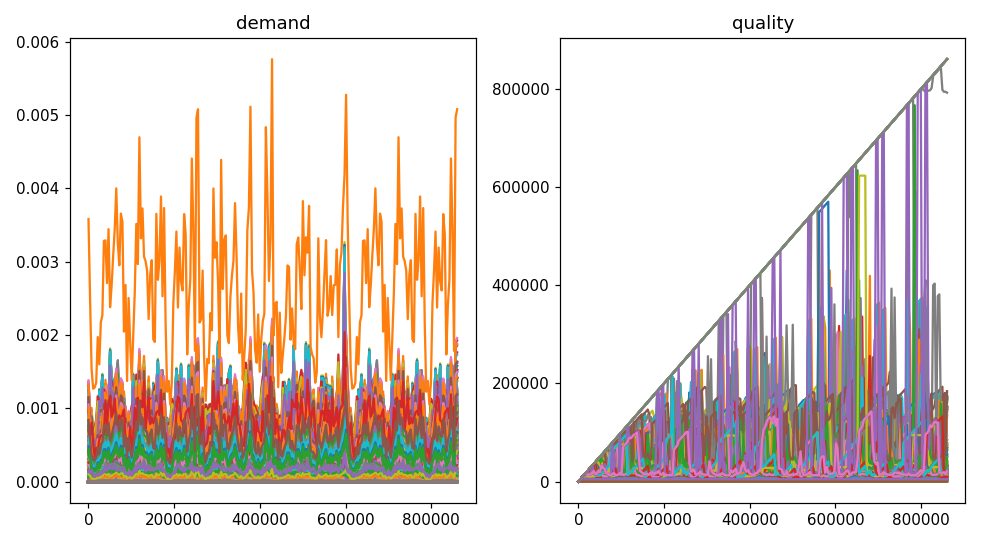

In [51]:
fig_1, ax_1 = plt.subplots(1,2, figsize=(9,5))
demand = results.node['demand'][toPlotNames[2]] # Junctions
quality = results.node['quality'][toPlotNames[2]] # Junctions
ax_1[0].plot(demand)
ax_1[0].set_title('demand')
ax_1[1].plot(quality)
ax_1[1].set_title('quality')
fig_1.tight_layout()



<IPython.core.display.Javascript object>


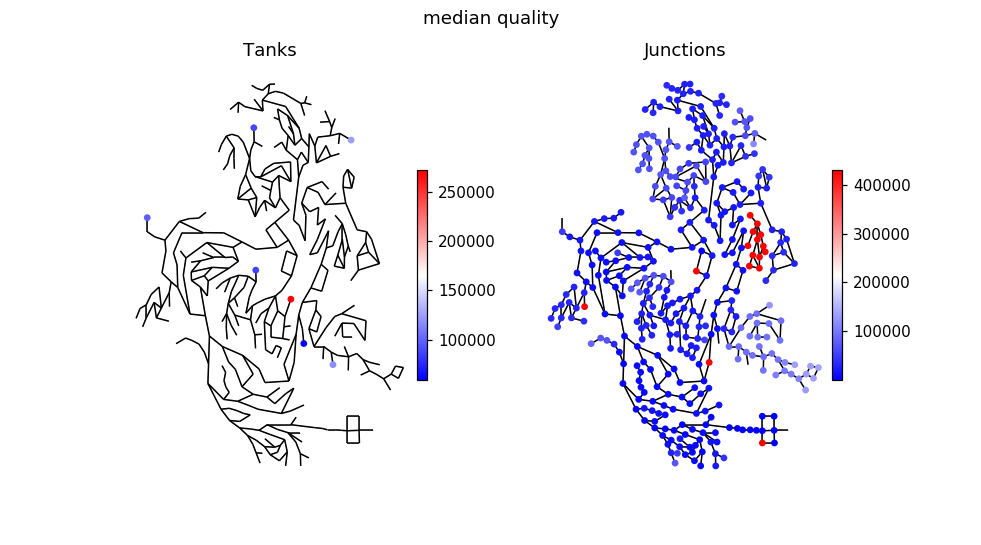

(<matplotlib.collections.PathCollection at 0x7fe7e027e810>,
 <matplotlib.collections.LineCollection at 0x7fe7e027ec50>)

In [69]:
fig_2, ax_2 = plt.subplots(1,2, figsize=(9,5))
fig_2.suptitle('median quality', fontsize=12)
df = results.node['quality']
df_med = df.median()

wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[0]], node_cmap='bwr', title='Tanks', ax=ax_2[0])  # tanks
wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[2]], node_cmap='bwr', title='Junctions', ax=ax_2[1])  # junctions

<IPython.core.display.Javascript object>


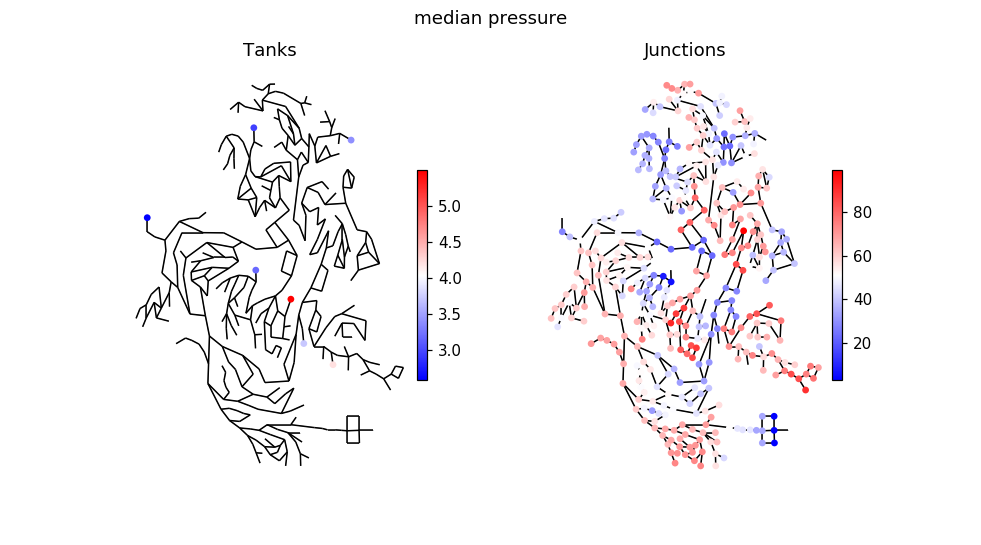

(<matplotlib.collections.PathCollection at 0x7fe7e0aa8d10>,
 <matplotlib.collections.LineCollection at 0x7fe7e0a29950>)

In [65]:
fig_3, ax_3 = plt.subplots(1,2, figsize=(9,5))
fig_3.suptitle('median pressure', fontsize=12)
df = results.node['pressure']
df_med = df.median()

wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[0]], node_cmap='bwr', title='Tanks', ax=ax_3[0])  # tanks
wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[2]], node_cmap='bwr', title='Junctions', ax=ax_3[1])  # junctions

## Links

In [79]:
results.link.keys()

dict_keys(['linkquality', 'flowrate', 'headloss', 'velocity', 'status', 'setting', 'frictionfact', 'rxnrate'])

In [81]:
results.link['flowrate']

name,P1,P10,P100,P1000,P101,P1016,P102,P1022,P1023,P1024,...,PU6,PU7,PU8,PU9,PU10,PU11,v1,V45,V47,V2
0,0.000543,-0.000919,-0.190171,0.039734,0.000263,0.032990,0.179527,-0.000221,0.001543,0.004111,...,0.0,0.049908,0.035576,0.0,0.030832,0.0,0.005862,0.003337,0.003139,0.108182
3600,0.000578,-0.000978,-0.190410,0.039551,0.000280,0.037309,0.179085,-0.000155,0.001083,0.002886,...,0.0,0.049182,0.035385,0.0,0.030514,0.0,0.004114,0.002342,0.002203,0.106065
7200,0.000903,-0.001529,-0.192084,0.039657,0.000437,0.040395,0.174389,-0.000095,0.000663,0.001766,...,0.0,0.047661,0.034293,0.0,0.029891,0.0,0.002518,0.001433,0.001348,0.101270
10800,0.000553,-0.000937,-0.190507,0.037762,0.000268,0.040958,0.179663,-0.000078,0.000546,0.001455,...,0.0,0.046947,0.034231,0.0,0.028744,0.0,0.002075,0.001181,0.001111,0.102682
14400,0.000554,-0.000938,-0.189438,0.022127,0.000268,0.041240,0.178579,-0.000079,0.000553,0.001474,...,0.0,0.047305,0.036038,0.0,0.000000,0.0,0.002102,0.001196,0.001125,0.095188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846000,0.000900,-0.001524,-0.193236,0.021005,0.000436,0.030419,0.175598,-0.000271,0.001899,0.005059,...,0.0,0.051235,0.000000,0.0,0.032284,0.0,0.007213,0.004106,0.003862,0.074931
849600,0.001286,-0.002178,-0.195036,0.021540,0.000623,0.034878,0.169823,-0.000209,0.001462,0.003895,...,0.0,0.050905,0.000000,0.0,0.030744,0.0,0.005553,0.003161,0.002974,0.072035
853200,0.001211,-0.002051,-0.195330,0.041201,0.000586,0.040591,0.171592,-0.000110,0.000769,0.002048,...,0.0,0.049016,0.035143,0.0,0.030101,0.0,0.002919,0.001662,0.001563,0.071388
856800,0.001692,-0.002865,-0.198049,0.042290,0.000819,0.028053,0.164882,-0.000306,0.002140,0.005700,...,0.0,0.051506,0.035196,0.0,0.029062,0.0,0.008127,0.004626,0.004352,0.066429


In [85]:
results.__dict__.keys()

dict_keys(['timestamp', 'network_name', 'link', 'node'])